<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/TimeSeries_PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series preprocessing refers to the steps taken to clean, transform, and prepare time series data for analysis or forecasting. It involves techniques aimed at improving data quality, removing noise, handling missing values, and making the data suitable for modeling. Preprocessing tasks may include removing outliers, handling missing values through imputation, scaling or normalizing the data, detrending, deseasonalizing, and applying transformations to stabilize variance. The goal is to ensure that the time series data is in a suitable format for subsequent analysis or modeling.

**Handling Missing Values :** Dealing with missing values in the time series data to ensure continuity and reliability in analysis.

**Dealing with Outliers:** Identifying and addressing observations that significantly deviate from the rest of the data, which can distort analysis results.

**Stationarity and Transformation:** Ensuring that the statistical properties of the time series, such as mean and variance, remain constant over time. Techniques like differencing, detrending, and deseasonalizing are used to achieve stationarity.

Stationarity

How to Check if Time Series Data is Stationary with Python?

Time series data are generally characterized by their temporal nature. This temporal nature adds a trend or seasonality to the data that makes it compatible for time series analysis and forecasting. Time-series data is said to be stationary if it doesn't change with time or if they don't have a temporal structure. So, it is highly necessary to check if the data is stationary. In time series forecasting, we cannot derive valuable insights from data if it is stationary.

Types of stationarity:
When it comes to identifying if the data is stationary, it means identifying the fine-grained notions of stationarity in the data. The types of stationarity observed in time series data include

Trend Stationary -  A time series that does not show a trend.

Seasonal Stationary - A time series that does not show seasonal changes.

Strictly Stationary - The joint distribution of observations is invariant to time shift.

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121
1949-06          135
1949-07          148
1949-08          148
1949-09          136
1949-10          119


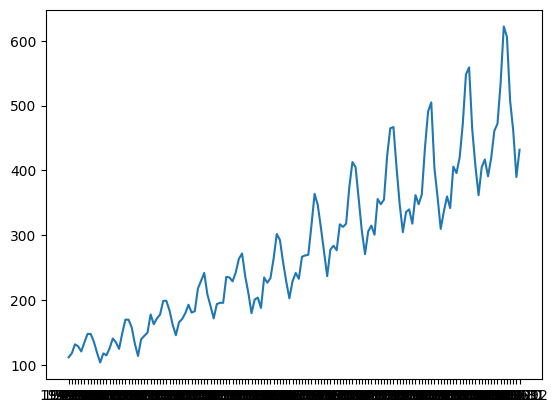

In [2]:
# import python pandas library
import pandas as pd

# import python matplotlib library for
# plotting
import matplotlib.pyplot as plt

# read the dataset using pandas read_csv()
# function
data = pd.read_csv("AirPassengers.csv",
                   header=0, index_col=0)

# print the first 6 rows of data
print(data.head(10))

# use simple line plot to understand the
# data distribution
plt.plot(data)

Now, let's partition this data into different groups and calculate the mean and variance of different groups and check for consistency.

In [3]:
# import the python pandas library
import pandas as pd

# use pandas read_csv() function to read the dataset.
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the air passengers count from
# the dataset using values function
values = data.values

# getting the count to split the dataset into 3
parts = int(len(values)/3)

# splitting the data into three parts
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated
# three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=158.375000, mean2=269.041667, mean2=413.479167
variance1=1071.859375, variance2=3041.289931, variance2=6033.624566


The output clearly implies that the mean and variance of the three groups are considerably different from each other describing the data is non-stationary. Say for example if the means where mean_1 = 150, mean_2 = 160, mean_3 = 155 and variance_1 = 33, variance_2 = 35, variance_3 = 37, then we can conclude that the data is stationary. Sometimes this method can fail for some distributions, like log-norm distributions.

Let's try the same example as above but take the log of the passengers' count using NumPy's log() function and check the results.

[[4.71849887]
 [4.77068462]
 [4.88280192]
 [4.8598124 ]
 [4.79579055]
 [4.90527478]
 [4.99721227]
 [4.99721227]
 [4.91265489]
 [4.77912349]
 [4.6443909 ]
 [4.77068462]
 [4.74493213]
 [4.83628191]
 [4.94875989]]


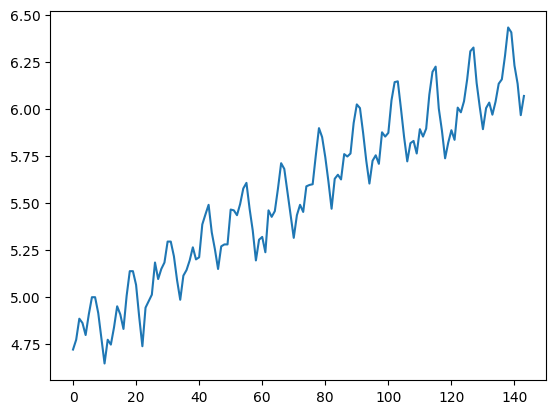

In [6]:
# import python pandas library
import pandas as pd

# import python matplotlib library for plotting
import matplotlib.pyplot as plt

# import python numpy library
import numpy as np

# read the dataset using pandas read_csv()
# function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the air passengers count
# from the dataset using values function
values = np.log(data.values)

# printing the first 15 passenger count values
print(values[0:15])

# using simple line plot to understand the
# data distribution
plt.plot(values)

The output signifies there is some trend but not very steep as the previous case, now let's compute the partition mean and variance

In [7]:
# getting the count to split the dataset
# into 3 parts
parts = int(len(values)/3)

# splitting the data into three parts.
part_1, part_2, part_3 = values[0:parts], values[parts:(parts*2)], values[(parts*2):(parts*3)]

# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()

# calculating the variance of the separated three
# parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))

# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=5.043911, mean2=5.574733, mean2=6.007884
variance1=0.042007, variance2=0.039668, variance2=0.032704


Ideally, we would have expected the mean and variance to be very different but they are the same, in such cases, this method can terribly fail. In order to avoid this, we have another statistical test which is discussed below.


Augmented Dickey-Fuller test


This is a statistical test that is dedicatedly built to test whether univariate time series data is stationary or not. This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted. It is often classified under one of the unit root tests, It determines how strongly, a univariate time series data follows a trend. Let's define the null and alternate hypotheses,

Ho (Null Hypothesis): The time series data is non-stationary

H1 (alternate Hypothesis): The time series data is stationary

Assume alpha = 0.05, meaning (95% confidence). The test results are interpreted with a p-value if p > 0.05 fails to reject the null hypothesis, else if p <= 0.05 reject the null hypothesis. Now, let's use the same air passengers dataset and test it using adfuller() statistical function provided by the stats model package, to check whether the data is stationary or not.

In [8]:
# import python pandas package
import pandas as pd

# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# read the dataset using pandas read_csv() function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the passengers count using values function
values = data.values

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: 0.815369
p-value: 0.991880
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


As per our hypothesis, the ADF statistic is much greater than the critical values at different levels, and also the p-value is also greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary.

Now, let's try running the ADF test to the log normed values and cross-check our results.

In [10]:
# import python pandas package
import pandas as pd

# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# import python numpy package
import numpy as np

# read the dataset using pandas read_csv() function
data = pd.read_csv("AirPassengers.csv", header=0, index_col=0)

# extracting only the passengers count using
# values function and applying log transform on it.
values = np.log(data.values)

# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.717017
p-value: 0.422367
critical values at different levels:
	1%: -3.482
	5%: -2.884
	10%: -2.579


As you can see, the ADF test one more times shows that the ADF statistic is much greater than the critical values at different levels, and also the p-value is much greater than 0.05 which signifies, we can fail to reject the null hypothesis at 90%, 95%, and 99% confidence, meaning the time series data is strongly non-stationary.

Hence, the ADF unit root test stands out to be a robust test to check whether a time series data is stationary or not.